# Checkpoint V1 - pré-processamento

1. Definir valores NA "#NULO!" (ok)
2. Unificar colunas e linhas (ok)
3. Converter valores numéricos com vírgula para ponto (ok)
4. Transformar valores descritivos em categóricos com códigos (ok)
5. Dropar colunas/linhas com NA que não irão auxiliar (ok)
6. Preencher valores NA de colunas mantidas (ok)
7. Transformar colunas descritivas em categoria (radicais de palavras, centralizar problemas) (ok, manual)

# Checkpoint V1 - predição

### Exaustão: baixa (< 2,0) média (2,1 a 3,19) alta (> 3,2)
### Cinismo: baixa (< 1,0) média (1,11 a 2,1) alta (> 2,2)
### Engajamento: baixa (< 4,0) média (4,01 a 4,99) alta (> 5)

* 1. Determinar a classificação dos indivíduos com diferentes hipóteses
* 1.1. Com Exaustao e Cinismo abaixo da média e Engagement acima da média
* 1.2. Com Exaustão ou Cinismo altos (abaixo da média)
* 1.3. Com qualquer um dos escores altos
* 2. Selecionar método de classificação
* 3. Aferir a qualidade e realizar comparações
* 4. Plotar gráficos de resultados

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

df_features_pre_processed = pd.read_csv('dataset_filled.csv')

In [100]:
# Remova as colunas calculadas intermediárias, mantenha apenas as colunas que representam respostas diretas

trab_cols = ['trab'+str(i) for i in range(1, 33)]
atitrab_cols = ['atitrab'+str(i) for i in range(1, 21)]
be_cols = ['be'+str(i) for i in range(1, 20)]
bes_cols = ['bes'+str(i) for i in range(1, 6)]
saude_cols = ['saude'+str(i) for i in range(1, 5)]

df_features_pre_processed = df_features_pre_processed.drop(columns=trab_cols+atitrab_cols+be_cols+bes_cols+saude_cols)
# df_features = df_joined_cats.drop(columns=trab_cols+atitrab_cols+be_cols+bes_cols+saude_cols)
# df_features.columns

In [101]:
# Implementação das três hipóteses

_EXA_COL = 'Exaustao'
_CIN_COL = 'Cinismo'
_ENG_COL = 'Engagement'
_SCV_COL = 'SCV'

_MEAN_E = df_features_pre_processed[_EXA_COL].median()
_MEAN_C = df_features_pre_processed[_CIN_COL].median()
_MEAN_G = df_features_pre_processed[_ENG_COL].median()
_MEAN_SCV = df_features_pre_processed[_SCV_COL].median()

_MIN_E = 3.2
_MIN_C = 2.2
_MIN_G = 4

# Gereric rules
def add_rule(who, rules):
    
    global df_features_pre_processed
    
    if who in df_features_pre_processed.columns:
        df_features_pre_processed.drop(columns=[who], inplace=True)

    where = len(df_features_pre_processed.columns)
    what = df_features_pre_processed.apply(rules, axis=1)
    
    df_features_pre_processed.insert(where, who, what)


    
    
# 1.1

# burnout_classification_rules = lambda x: x[_EXA_COL] > _MEAN_E and x[_CIN_COL] > _MEAN_C and x[_ENG_COL] < _MEAN_G
# burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E and x[_CIN_COL] > _MIN_C and x[_ENG_COL] < _MIN_G

# add_rule('Burnout', burnout_classification_rules)

burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E or x[_CIN_COL] > _MIN_C

add_rule('Burnout_EorC', burnout_classification_rules)


# 1.2

burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E or x[_ENG_COL] < _MIN_G

add_rule('Burnout_EorG', burnout_classification_rules)

# 1.3

burnout_classification_rules = lambda x: x[_CIN_COL] > _MIN_C or x[_ENG_COL] < _MIN_G

add_rule('Burnout_GorC', burnout_classification_rules)


# 1.4

# burnout_classification_rules = lambda x: x[_EXA_COL] > _MEAN_E or x[_CIN_COL] > _MEAN_C
burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E or x[_CIN_COL] > _MIN_C

add_rule('Burnout_EC', burnout_classification_rules)

# 1.5

# burnout_classification_rules = lambda x: x[_EXA_COL] > _MEAN_E or x[_CIN_COL] > _MEAN_C or x[_ENG_COL] < _MEAN_G
burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E or x[_CIN_COL] > _MIN_C or x[_ENG_COL] < _MIN_G

add_rule('Burnout_ANY', burnout_classification_rules)

# 1.6

burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E or x[_ENG_COL] < _MIN_G

add_rule('Burnout_EG', burnout_classification_rules)

# 1.7

burnout_classification_rules = lambda x: x[_CIN_COL] > _MIN_C or x[_ENG_COL] < _MIN_G

add_rule('Burnout_CG', burnout_classification_rules)

# 1.8

burnout_classification_rules = lambda x: x[_CIN_COL] > _MIN_C

add_rule('Burnout_C', burnout_classification_rules)

# 1.9

burnout_classification_rules = lambda x: x[_ENG_COL] < _MIN_G

add_rule('Burnout_G', burnout_classification_rules)

# 1.10

burnout_classification_rules = lambda x: x[_EXA_COL] > _MIN_E

add_rule('Burnout_E', burnout_classification_rules)

In [102]:
for c in filter(lambda x : 'Burnout' in x, df_features_pre_processed.columns):
    print(c, len(df_features_pre_processed[df_features_pre_processed[c] == True]) / len(df_features_pre_processed) * 100)

Burnout_EorC 41.612090680100756
Burnout_EorG 41.56171284634761
Burnout_GorC 16.649874055415616
Burnout_EC 41.612090680100756
Burnout_ANY 43.02267002518892
Burnout_EG 41.56171284634761
Burnout_CG 16.649874055415616
Burnout_C 11.964735516372796
Burnout_G 7.632241813602016
Burnout_E 39.77329974811083


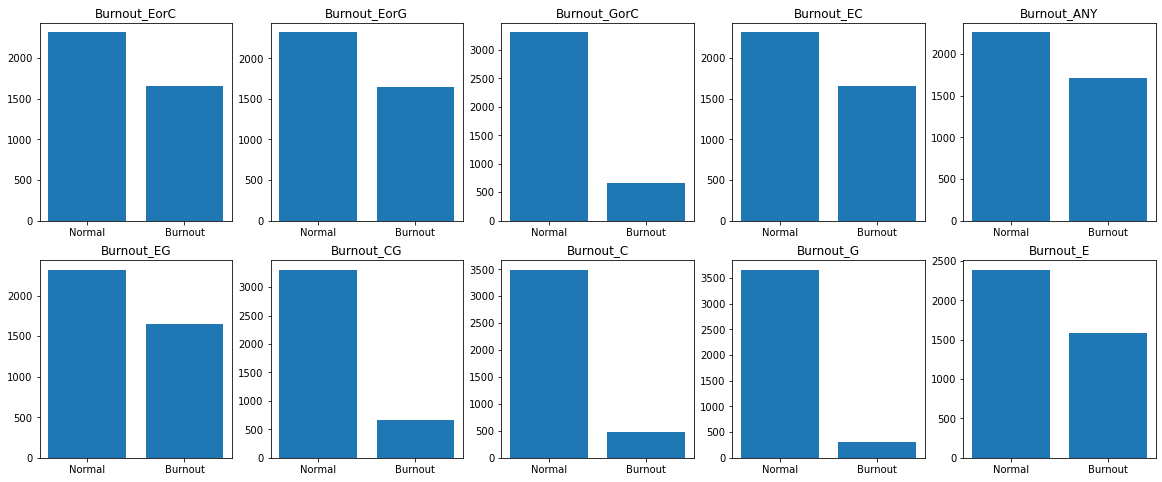

In [103]:
# Qual das três hipóteses parece ser a mais promissora?

rules = dict()

for c in filter(lambda x : 'Burnout' in x, df_features_pre_processed.columns):
    rules[c] = df_features_pre_processed[c].value_counts().sort_index().values

i, j, count = 0,0,0
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for k in rules.keys():
    if j == 5:
        j = 0
        i = 1
    axes[i][j].bar(['Normal', 'Burnout'], rules[k])
    axes[i][j].set_title(k)
    j += 1
    
plt.show()

# plt.figure(figsize=(10,6))
# plt.bar(['Sem Burnout', 'Com Burnout'], rule1)
# plt.title('Classificação de Burnout')
# plt.show()

In [ ]:
# df_features_pre_processed = df_features_pre_processed.drop(columns=['Burnout'])

In [ ]:
# print(_MEAN_E, _MEAN_C, _MEAN_G)
# df_features_pre_processed = df_features_pre_processed.drop(columns=['IdadeCat', 'NrProfCat'])

In [ ]:
# for c in filter(lambda x : 'Burnout' in x, df_features_pre_processed.columns):
    # print(c)
# df_features_pre_processed[['PIB', 'Populacao', 'IDHM', 'PIBPer', 'INVperc', 'Investimento', 'Turma', 'Alunos', 'Professores', 'Formação']]

In [104]:
# Utilize uma Random Forest para classificar os indivíduos. Verifique o resultado com 10-fold cross-validation

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import average_precision_score, precision_recall_fscore_support, plot_confusion_matrix

drop_this_too = ['Unnamed: 0']
# drop_this_too = ['Tipo_escola', 'escola1', 'Niveis_escola', 'Sexo', 'Área_Ed_Inf', 'Área_EF_finais', 'Área_EF_iniciais', 'Área_Ens_Médio', 'Área_Ens_Téc', 'Contrato', 'Outro_qual', 'Supervisiona', 'Licença_2semanas', 'Porquê_A', 'Licença_ano', 'Quantotempo', 'Porquê_B']
# drop_this_too = drop_this_too + ['PIB', 'Populacao', 'IDHM', 'PIBPer', 'INVperc', 'Investimento', 'Turma', 'Alunos', 'Professores', 'Formação']
# drop_this_too = drop_this_too + ['Numero_professores', 'Hrs_semanais']

# Usando Exaustão como atributo

# df_feat_no_class = df_features_pre_processed.drop(columns=[_EXA_COL, _CIN_COL, _ENG_COL] + [c for c in df_features_pre_processed if 'Burnout' in c] + ['Escola_resp_Quest', 'NomeEscola', 'Escolcod'] + drop_this_too)
# [_CIN_COL, _ENG_COL]

# print(df_feat_no_class.columns)

# mean_cv_scores = []
scores = dict()

# interval = 0.1

for c in filter(lambda x : 'Burnout' in x, df_features_pre_processed.columns):
    
    # df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c] + ['Escola_resp_Quest', 'NomeEscola', 'Escolcod'] + drop_this_too)
    # df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c] + ['Escola_resp_Quest', 'Escolcod'] + drop_this_too)
    df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c] + drop_this_too)
        
    TARGET_CLASS = c
    
    # Dropa as colunas que estão diretamente relacionadas ao preditor
    if 'C' in TARGET_CLASS or 'E' in TARGET_CLASS or 'G' in TARGET_CLASS:
        if 'C' in TARGET_CLASS:
            df_feat_no_class = df_feat_no_class.drop(columns=[_CIN_COL])
        if 'E' in TARGET_CLASS:
            df_feat_no_class = df_feat_no_class.drop(columns=[_EXA_COL])
        if 'G' in TARGET_CLASS:
            df_feat_no_class = df_feat_no_class.drop(columns=[_ENG_COL])
    else:
        df_feat_no_class = df_feat_no_class.drop(columns=[_CIN_COL, _EXA_COL, _ENG_COL])
        
    scores[c] = dict()

    # for t in range(2, 5):
    # for T in [0.33, 0.35]:
    for T in [0.33]:
        X_train, X_test, y_train, y_test = train_test_split(df_feat_no_class, df_features_pre_processed[TARGET_CLASS], stratify=df_features_pre_processed[TARGET_CLASS], test_size=T)

        # print('\n', c, y_test.sum())

        rfc = RandomForestClassifier()
        rfc.fit(X_train, y_train)
        # preds = rfc.predict(X_test)
        
        # svm = SVC(kernel="linear", C=0.025)
        # svm.fit(X_train, y_train)

        cross_scores = cross_val_score(rfc, df_feat_no_class, df_features_pre_processed[TARGET_CLASS], cv=10, scoring='accuracy')
        # cv_results = cross_validate(rfc, df_feat_no_class, df_features_pre_processed.Burnout, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1'))
        # print(cv_results)
        # print('Random Forest', scores, scores.mean())
        # mean_cv_scores.append(scores)
                        
        # scores = cross_val_score(svm, df_feat_no_class, df_features_pre_processed[TARGET_CLASS], cv=3, scoring='accuracy')
        # print('SVM', scores, scores.mean())
        
        preds = rfc.predict(X_test)
        average_precision = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=0)
        # print('Random Forest', 'Precision:', average_precision[0], 'Recall:', average_precision[1], 'fBeta: ', average_precision[2])
        
        scores[c] = {'accuracy' : cross_scores.mean(), 'precision' : average_precision[0], 'recall' : average_precision[1], 'f1' : average_precision[2], 'population' : y_test.sum()}
        
        # print(TARGET_CLASS, t*10)
        # plot_confusion_matrix(rfc, X_test, y_test)  
        # plt.show()  
        
        # preds = svm.predict(X_test)
        # average_precision = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=0)
        # print('SVM', 'Precision:', average_precision[0], 'Recall:', average_precision[1], 'fBeta: ', average_precision[2])
    
# print('Accuracy RandomForest {0:0.2f}'.format(accuracy_score(y_test.values, preds)))


In [105]:
 #scores

# for k in rules:
#     print(k, rules[k][1] / sum(rules[k]))

# df_feat_no_class.columns
for c in df_feat_no_class.columns:
    print(c, end='\t')

Idade	Formação	Tempo_Escola	Tempo_profissão	Hrs_semanais	Numero_professores	Supervisiona	Licença_2semanas	Licença_ano	MPS	IPPS	IOPS	ISP	CAFC	VSP	ARE	DED	ARS	AED	Engagement	Cinismo	SCV	Saude	Indiv	Populacao	PIB	IDHM	PIBPer	INVperc	Turma	Alunos	Professores	Investimento	TAMesc	

In [110]:
import pprint

pprint.pprint(scores)
# pprint.pprint({k: v for k, v in sorted(scores.items(), key=lambda item: item['accuracy'])})
# scores

{'Burnout_ANY': {'accuracy': 0.6035264483627205,
                 'f1': 0.6667068079640335,
                 'population': 564,
                 'precision': 0.6752718418704535,
                 'recall': 0.665050272010026},
 'Burnout_C': {'accuracy': 0.8727959697732999,
               'f1': 0.5667269238873671,
               'population': 157,
               'precision': 0.7672586571651264,
               'recall': 0.5529920851317489},
 'Burnout_CG': {'accuracy': 0.8418136020151132,
                'f1': 0.6482244804749944,
                'population': 218,
                'precision': 0.7736785423215742,
                'recall': 0.6183826183301577},
 'Burnout_E': {'accuracy': 0.7110831234256928,
               'f1': 0.7206024133066766,
               'population': 521,
               'precision': 0.7383774543375917,
               'recall': 0.7147962778493161},
 'Burnout_EC': {'accuracy': 0.6554156171284635,
                'f1': 0.6916960111102539,
                'population': 54

In [27]:
highest_acc, highest_rec, highest_pre, highest_f1 = 0,0,0,0
best_split_acc, best_split_rec, best_split_pre, best_split_f1 = 0,0,0,0
best_class_acc, best_class_rec, best_class_pre, best_class_f1 = '', '', '', ''

for k in scores.keys():
    
    # sum_acc, sum_pre, sum_rec, sum_f1 = 0,0,0,0
    acc, pre, rec, f1, pop = [], [], [], [], []
    
    for kk in scores[k].keys():
        
        c_val = scores[k][kk]
        
        acc.append(c_val['accuracy'])
        pre.append(c_val['precision'])
        rec.append(c_val['recall'])
        f1.append(c_val['f1'])
        pop = c_val['population']
        # sum_acc += c_val['accuracy']
        # sum_pre += c_val['precision']
        # sum_rec += c_val['recall']
        # sum_f1 += c_val['f1']
        
        if c_val['accuracy'] > highest_acc:
            highest_acc = c_val['accuracy']
            best_split_acc = kk
            best_class_acc = k
        if c_val['precision'] > highest_pre:
            highest_pre = c_val['precision']
            best_split_pre = kk
            best_class_pre = k
        if c_val['recall'] > highest_rec:
            highest_rec = c_val['recall']
            best_split_rec = kk
            best_class_rec = k
        if c_val['f1'] > highest_f1:
            highest_f1 = c_val['f1']
            best_split_f1 = kk
            best_class_f1 = k
    
    print(k, 'Acuracy', np.mean(acc).round(4), np.std(acc).round(4), 'Precision', np.mean(pre).round(4), np.std(pre).round(4), 
          'Recall', np.mean(rec).round(4), np.std(rec).round(4), 'F1', np.mean(f1).round(4), np.std(f1).round(4), sep='\t')
    print('\n')

# print(best_split_acc, highest_acc, best_class_acc)
# print(best_split_pre, highest_pre, best_class_pre)
# print(best_split_rec, highest_rec, best_class_rec)
# print(best_split_f1, highest_f1, best_class_f1)
        

IndexError: invalid index to scalar variable.

In [40]:
# print(scores, scores.mean())

# df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c] + ['Escola_resp_Quest', 'NomeEscola', 'Escolcod'] + drop_this_too)
# df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c] + ['Escola_resp_Quest', 'Escolcod'] + drop_this_too)
df_feat_no_class = df_features_pre_processed.drop(columns=[c for c in df_features_pre_processed if 'Burnout' in c] + drop_this_too)
df_feat_no_class = df_feat_no_class.drop(columns=[_EXA_COL, _ENG_COL])
# df_feat_no_class = df_feat_no_class.drop(columns=[_EXA_COL])

TARGET_CLASS = 'Burnout_EorG'
# TARGET_CLASS = 'Burnout_E'

X_train, X_test, y_train, y_test = train_test_split(df_feat_no_class, df_features_pre_processed[TARGET_CLASS], stratify=df_features_pre_processed[TARGET_CLASS], test_size=0.3)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
# scores2 = cross_val_score(rfc, df_feat_no_class, df_features_pre_processed[TARGET_CLASS], cv=10, scoring='accuracy')
average_precision = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=0)

print('Precision:', average_precision[0], 'Recall:', average_precision[1], 'fBeta: ', average_precision[2])
# print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Precision: 0.7639512019918548 Recall: 0.7517067223963776 fBeta:  0.7555949347958308


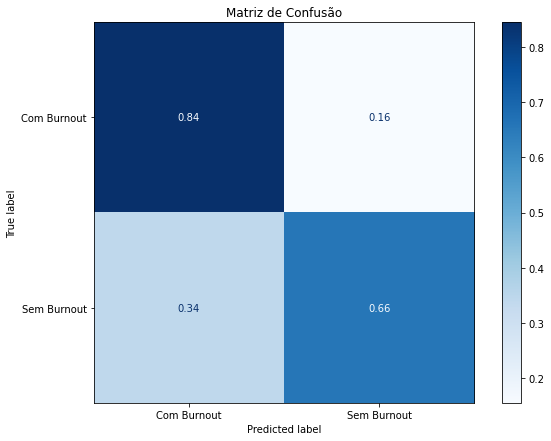

In [41]:
# plt.figure(figsize=(15,7))
fig, ax = plt.subplots(figsize=(10, 7))
disp = plot_confusion_matrix(rfc, X_test, y_test, display_labels=['Com Burnout', 'Sem Burnout'], cmap=plt.cm.Blues, normalize='true', ax=ax)
disp.ax_.set_title('Matriz de Confusão')
plt.show()  

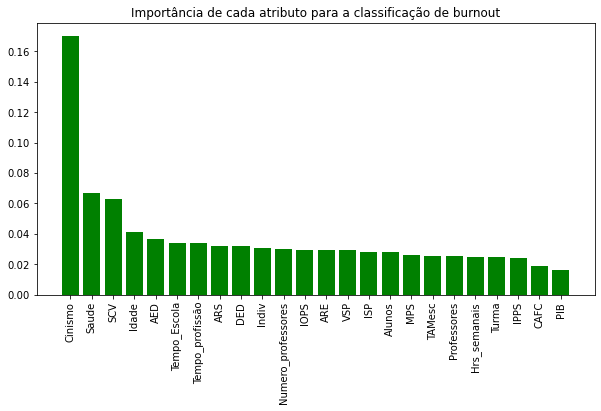

In [42]:
# Quais atributos são mais importantes?

fi = pd.DataFrame({'feature': list(df_feat_no_class.columns),
                   'importance': rfc.feature_importances_}).\
                    sort_values('importance', ascending = False)

# print(fi[fi.importance > fi.importance.mean()/2].importance)
select = fi[fi.importance > fi.importance.mean()/2]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(select.feature, select.importance.values, align='center', color='green', ecolor='black')
plt.title('Importância de cada atributo para a classificação de burnout')
plt.xticks(rotation=90)
plt.show()

In [43]:
df_feat_no_class = df_feat_no_class.drop(columns=['IdadeCat', 'NrProfCat'])

KeyError: "['IdadeCat' 'NrProfCat'] not found in axis"

# Plot da Árvore

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# TARGET_CLASS = 'Burnout_EorG'
TARGET_CLASS = 'Burnout_E'

# selected_cols = ['SCV', 'Saude', 'Idade', 'AED']
selected_cols = df_feat_no_class.columns # ['Cinismo', 'VSP', 'SCV', 'Saude', 'Idade', 'AED', 'IOPS', 'ISP', 'Indiv']
# selected_cols = ['Cinismo', 'Saude', 'SCV', 'Idade', 'Numero_professores', 'ARS', 'Tempo_profissão', 'Tempo_Escola', 'DED', 'AED', 'IOPS', 'MPS', 'ISP']

X_train, X_test, y_train, y_test = train_test_split(df_feat_no_class, df_features_pre_processed[TARGET_CLASS], stratify=df_features_pre_processed[TARGET_CLASS], test_size=0.3)

clf = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=200)
clf.fit(X_train[selected_cols], y_train)
preds = clf.predict(X_test[selected_cols])

scores = cross_val_score(clf, df_feat_no_class[selected_cols], df_features_pre_processed.Burnout_G, cv=10, scoring='accuracy')
average_precision = precision_recall_fscore_support(y_test, preds, average='macro')

print(scores.mean(), average_precision)

0.9113350125944585 (0.7123871209716972, 0.716606641597373, 0.7139436373693557, None)


In [45]:
df_feat_no_class.describe()

,Idade,Formação,Tempo_Escola,Tempo_profissão,Hrs_semanais,Numero_professores,Supervisiona,Licença_2semanas,Licença_ano,MPS,...,Populacao,PIB,IDHM,PIBPer,INVperc,Turma,Alunos,Professores,Investimento,TAMesc
count,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,...,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3.970000e+03,3970.000000
mean,40.217280,2.252292,7.345766,15.050180,28.968592,46.066348,1.225869,1.033854,1.192418,6.524579,...,95160.285050,38515.547002,0.767772,1.365926,3302.542868,19.192267,348.915315,28.147431,2.828632e+08,3.168907
std,9.687712,1.336263,6.961559,9.021149,12.117506,692.734333,0.415313,0.180625,0.394859,0.621545,...,75870.186041,3865.019182,0.010103,1.507599,551.166846,11.607903,236.309659,17.503319,2.173914e+08,1.861604
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,4719.000000,27477.200000,0.739000,0.200000,2861.340000,0.000000,20.000000,1.000000,2.545334e+07,0.510000
25%,33.000000,2.000000,2.000000,8.000000,20.000000,17.000000,1.000000,1.000000,1.000000,6.250000,...,20350.000000,36737.920000,0.762170,0.200000,2928.180000,11.000000,157.000000,16.000000,8.046563e+07,1.792500
50%,39.000000,2.000000,5.000000,14.000000,30.000000,28.000000,1.000000,1.000000,1.000000,6.670000,...,93212.300000,39737.730000,0.774000,0.950000,2943.850000,16.100000,286.000000,23.000000,2.807417e+08,2.730000
75%,48.000000,2.000000,10.000000,21.000000,40.000000,47.900000,1.000000,1.000000,1.000000,6.920000,...,203275.000000,41645.090000,0.776000,1.957333,3539.803400,23.000000,474.000000,38.150000,5.952268e+08,3.945500
max,84.000000,8.000000,55.000000,50.000000,200.000000,43652.000000,2.000000,2.000000,3.000000,12.830000,...,203275.000000,43296.750000,0.777000,7.790000,5772.400000,64.000000,1151.000000,81.000000,5.952268e+08,9.380000


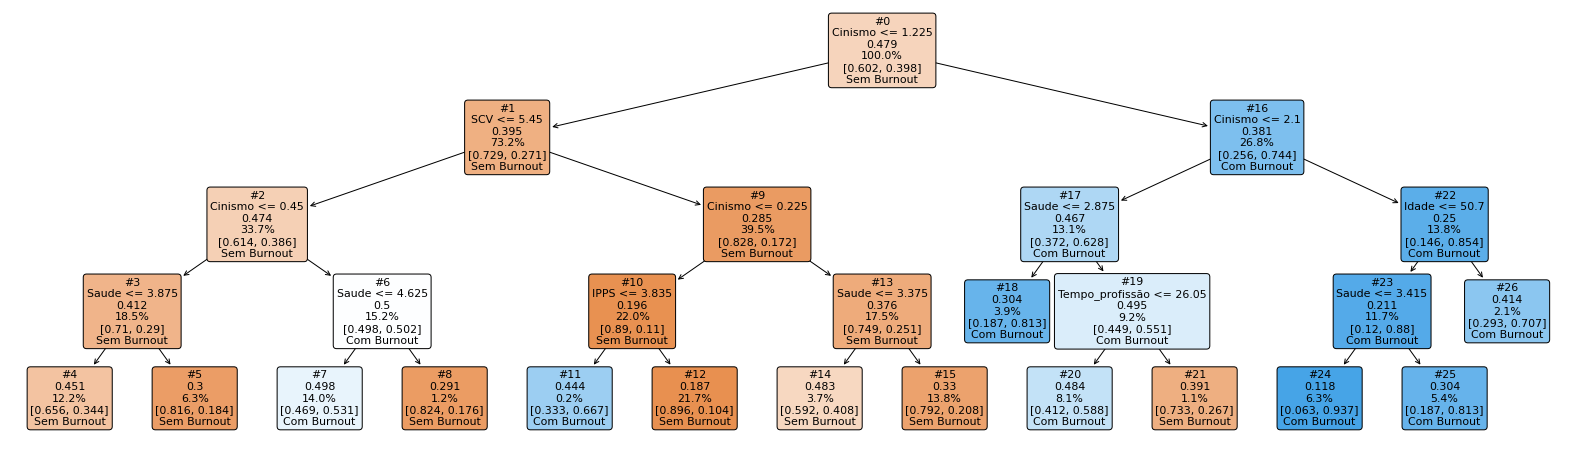

In [48]:
plt.figure(figsize=(28,8))
plt.title('teste')
tree.plot_tree(clf, label=None, node_ids=True, rounded=True, fontsize=11, feature_names=X_train[selected_cols].columns, filled=True, class_names=["Sem Burnout", "Com Burnout"], proportion=True)
plt.show()

# Burnout por idade

In [49]:
# Executar isso apenas uma vez:

if 'IdadeCat' in df_features_pre_processed.columns and 'NrProfCat' in df_features_pre_processed.columns:
    df_features_pre_processed = df_features_pre_processed.drop(columns=['IdadeCat', 'NrProfCat'])

aaa = pd.cut(df_features_pre_processed.Idade, [0, 24, 34, 44, 54, 64, 100], labels=["até 24", "24 a 34", "34 a 44", "44 a 54", "54 a 64", "Mais que 64"])
df_features_pre_processed.insert(len(df_features_pre_processed.columns), "IdadeCat", aaa)
bbb = pd.cut(df_features_pre_processed.Numero_professores, [0, 36, 72, 108, 144, 200], labels=["até 36", "36 a 72", "72 a 108", "108 a 144", "Mais que 144"])
df_features_pre_processed.insert(len(df_features_pre_processed.columns), "NrProfCat", bbb)

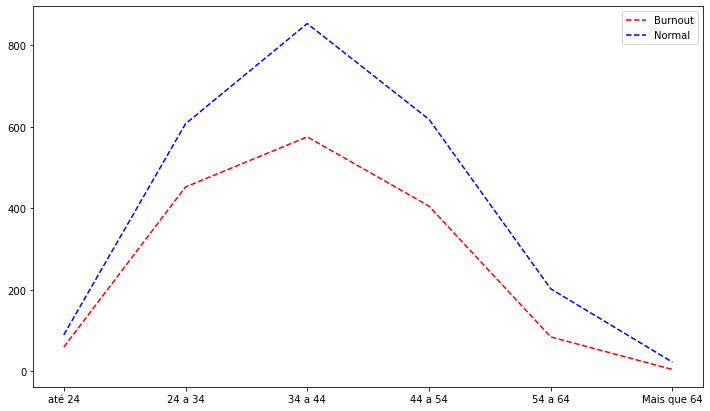

In [50]:
plt.figure(figsize=(12,7))

dfg = df_features_pre_processed[df_features_pre_processed[TARGET_CLASS]==1][["IdadeCat", TARGET_CLASS]].groupby(by=["IdadeCat"]).count()
dfg2 = df_features_pre_processed[df_features_pre_processed[TARGET_CLASS]==0][["IdadeCat", TARGET_CLASS]].groupby(by=["IdadeCat"]).count()

_x_axis = list(dfg.index)

plt.plot(_x_axis, dfg.values, 'r--', _x_axis, dfg2.values, 'b--')
plt.legend(('Burnout', 'Normal'))
plt.show()

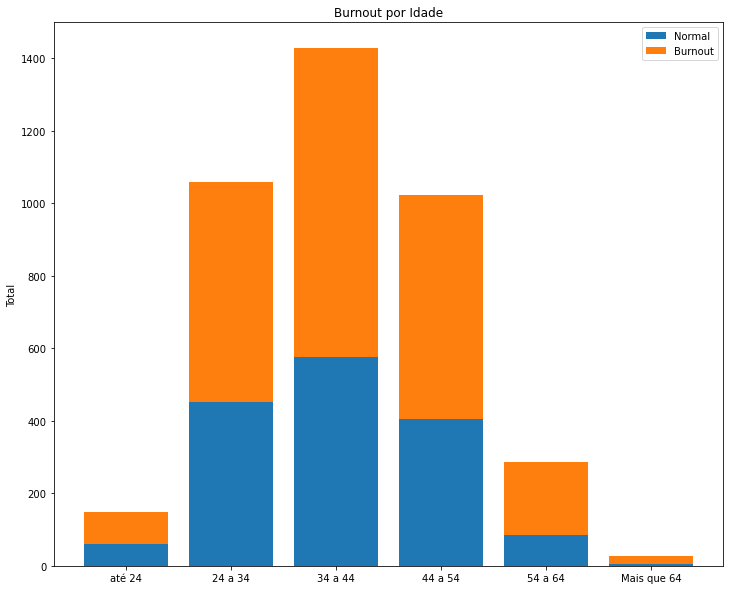

In [52]:
import numpy as np

plt.figure(figsize=(12,10))

ind = np.arange(len(_x_axis))
width = 0.35

p1 = plt.bar(ind, dfg.values.ravel())
p2 = plt.bar(ind, dfg2.values.ravel(), bottom=dfg.values.ravel())

plt.ylabel('Total')
plt.title('Burnout por Idade')
plt.xticks(ind, tuple(_x_axis))
plt.yticks()
plt.legend((p1[0], p2[0]), ('Normal', 'Burnout'))

plt.show()

In [ ]:
dfg2.values[1][0]

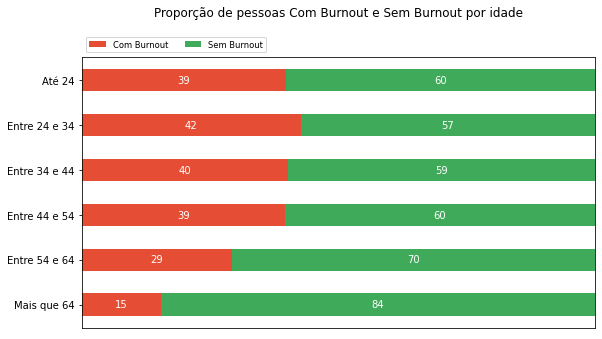

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def calc_cats(x):
    
    global dfg, dfg2
    
    return [dfg.values[x][0] / (dfg.values[x][0] + dfg2.values[x][0]) * 100, dfg2.values[x][0] / (dfg.values[x][0] + dfg2.values[x][0]) * 100]

category_names = ['Com Burnout', 'Sem Burnout']
results = {
    'Até 24': calc_cats(0),
    'Entre 24 e 34': calc_cats(1),
    'Entre 34 e 44': calc_cats(2),
    'Entre 44 e 54': calc_cats(3),
    'Entre 54 e 64': calc_cats(4),
    'Mais que 64': calc_cats(5)
}


def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.title('Proporção de pessoas Com Burnout e Sem Burnout por idade', pad=40)
plt.show()

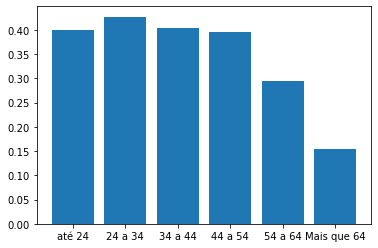

In [54]:
burnout_chance = dfg / (dfg + dfg2)
plt.bar(_x_axis, burnout_chance.values.reshape(-1))
plt.show()

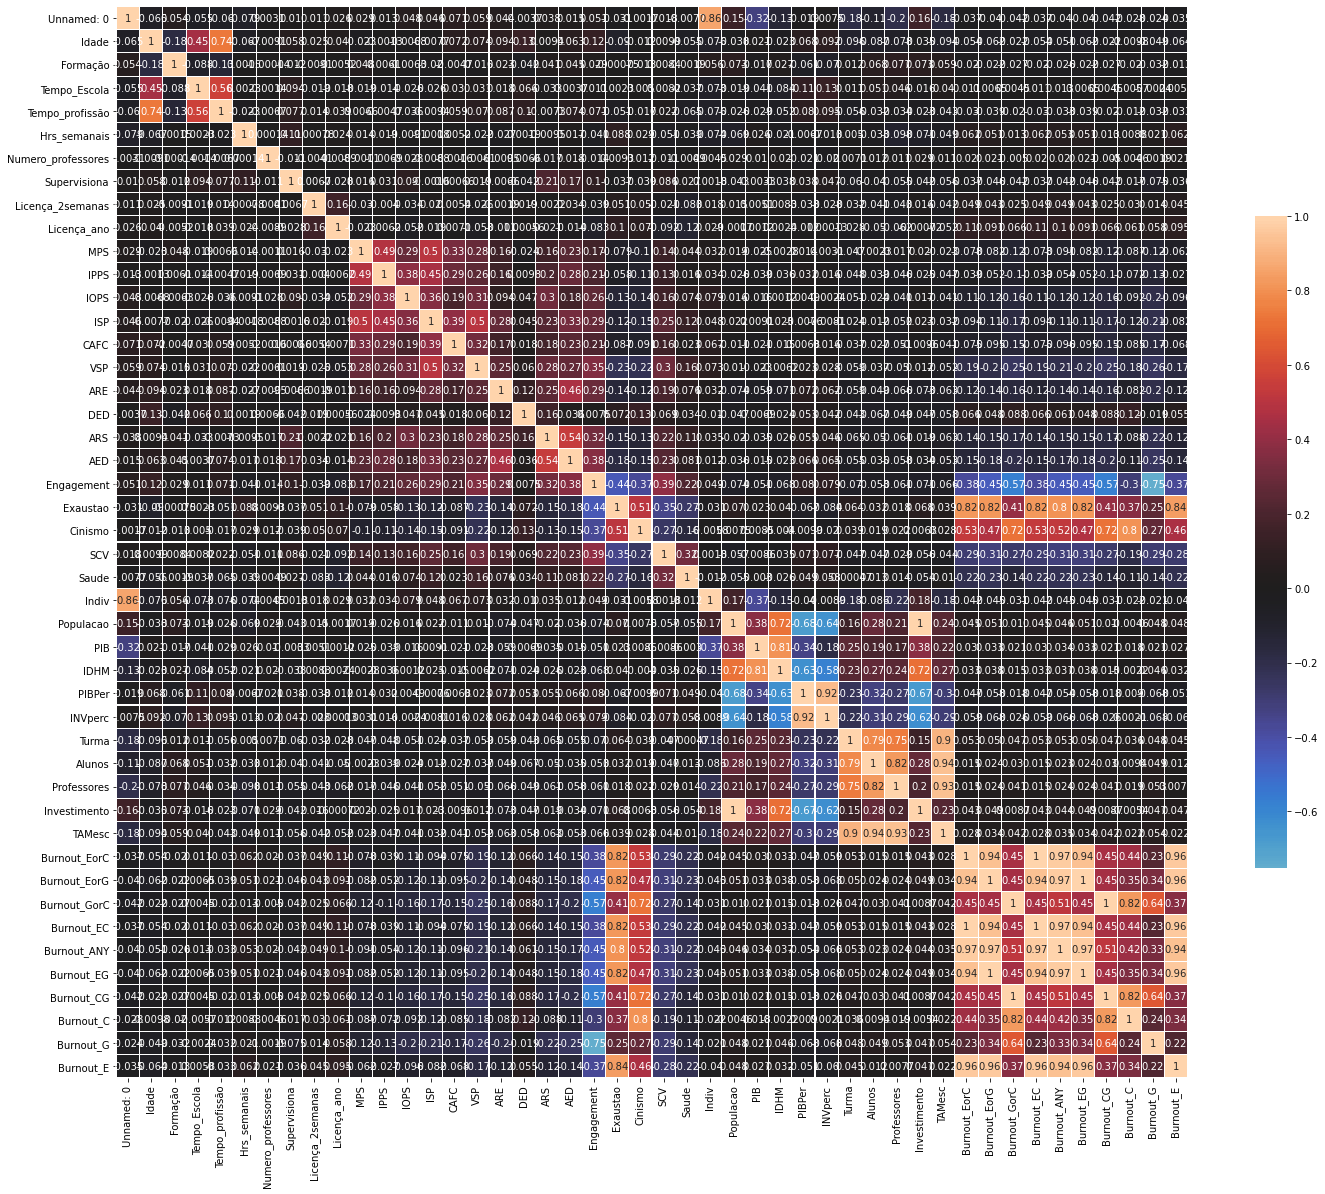

In [93]:
# Dez/2019: classificação
import seaborn as sns

x = df_features_pre_processed.iloc[0]
# x.Exaustao * x.Cinismo * x.SCV
this_cols = ['Engagement', 'Exaustao', 'Cinismo', 'SCV', 'Idade', 'Saude', 'Tempo_Escola', 'TAMesc']
this_cols = df_features_pre_processed.columns
corr = df_features_pre_processed[this_cols].corr()
# print(corr)
plt.figure(figsize=(24,24))
sns.heatmap(corr, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5},  annot=True)
plt.show()
# O melhor método para fazer a predição de Burnout dentre as hipóteses levantadas parece ser a combinação de Engagement, Cinismo e Exaustao porque gera uma população de cerca de 35% com Burnout.
# SCV, Saude e AED são os três preditores mais fortes de Burnout. Em seguida temos Idade e Numero de Professores na Escola.
# Há uma correlação alta entre os três preditores fortes e Engagement.
# Random Forest prediz Burnout com uma acurácia média de 71%.

<AxesSubplot:xlabel='Saude', ylabel='Cinismo'>

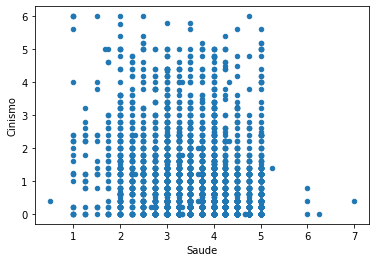

In [90]:
df_features_pre_processed[df_features_pre_processed['Saude'] < 10].plot.scatter('Saude', 'Cinismo')